<a href="https://colab.research.google.com/github/Tachelgup/Python_base/blob/main/Lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

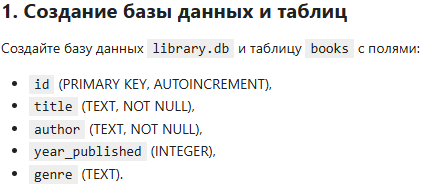

In [3]:
import sqlite3

connection = sqlite3.connect('library.db')

cursor = connection.cursor()

query = """
CREATE TABLE IF NOT EXISTS books(
  id INTEGER PRIMARY KEY AUTOINCREMENT,
  title TEXT NOT NULL,
  author TEXT NOT NULL,
  year_published INTEGER NOT NULL,
  genre TEXT
);
"""

cursor.execute(query)
connection.commit()
connection.close()

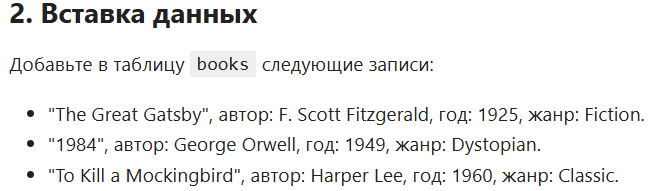

In [4]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

books = [
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
    ("1984", "George Orwell", 1949, "Dystopian"),
    ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
]

query = '''
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?)
'''
cursor.executemany(query, books)

connection.commit()
connection.close()

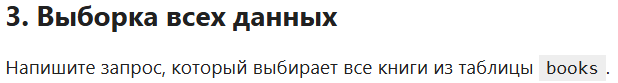

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM books")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

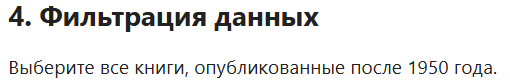

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM books WHERE year_published > 1950")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

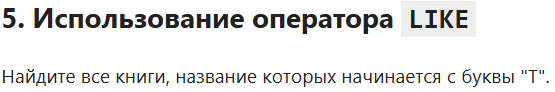

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM books WHERE title LIKE 'T%'")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

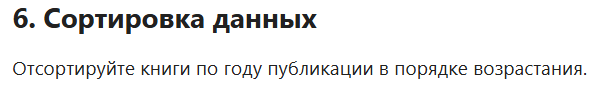

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM books ORDER BY year_published ASC")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

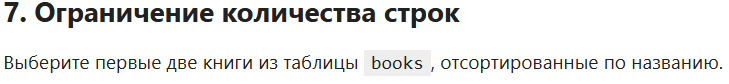

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT * FROM books ORDER BY title LIMIT 2")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

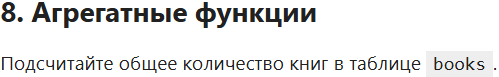

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT COUNT(*) FROM books")
count = cursor.fetchone()[0]

print(f"Общее количество книг: {count}")

connection.close()

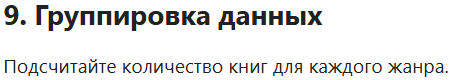

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("SELECT genre, COUNT(*) FROM books GROUP BY genre")
rows = cursor.fetchall()

for row in rows:
    print(f"Жанр: {row[0]}, Количество: {row[1]}")

connection.close()

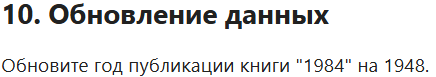

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("UPDATE books SET year_published = 1948 WHERE title = '1984'")
connection.commit()

cursor.execute("SELECT * FROM books WHERE title = '1984'")
print(cursor.fetchone())

connection.close()

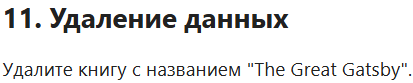

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("DELETE FROM books WHERE title = 'The Great Gatsby'")
connection.commit()

cursor.execute("SELECT * FROM books")
print(cursor.fetchall())

connection.close()

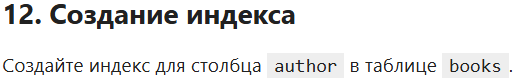

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute('''
CREATE INDEX IF NOT EXISTS idx_author
ON books (author);
''')
connection.commit()
connection.close()

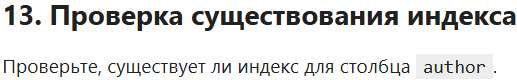

In [5]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("""
SELECT name FROM sqlite_master
WHERE type='index' AND name='idx_author'"""
)
index_exists = cursor.fetchone()

print("Индекс idx_author существует" if index_exists else "Индекс idx_author не существует")

connection.close()

Индекс idx_author не существует


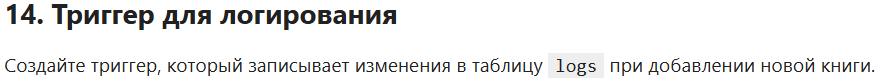

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS logs (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        action TEXT,
        book_title TEXT,
        timestamp TEXT
    )
''')

cursor.execute('''
    CREATE TRIGGER IF NOT EXISTS log_book_insert
    AFTER INSERT ON books
    FOR EACH ROW
    BEGIN
        INSERT INTO logs (action, book_title, timestamp)
        VALUES ('INSERT', NEW.title, datetime('now'));
    END
''')

cursor.execute('''
    INSERT INTO books (title, author, year_published, genre)
    VALUES ('Brave New World', 'Aldous Huxley', 1932, 'Dystopian')
''')

cursor.execute("SELECT * FROM logs")
print(cursor.fetchall())

connection.commit()
connection.close()

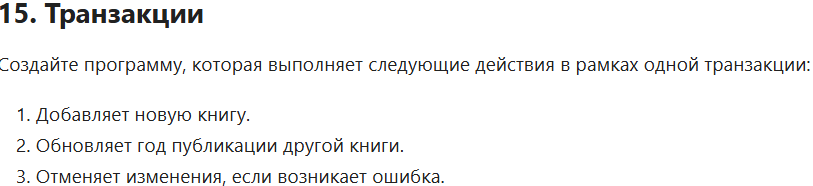

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

try:
    connection.execute("BEGIN TRANSACTION")

    cursor.execute('''
        INSERT INTO books (title, author, year_published, genre)
        VALUES ('Fahrenheit 451', 'Ray Bradbury', 1953, 'Dystopian')
    ''')

    cursor.execute("UPDATE books SET year_published = 1959 WHERE title = 'To Kill a Mockingbird'")

    connection.commit()
    print("Транзакция выполнена успешно")

except Exception as e:
    connection.rollback()
    print(f"Ошибка, изменения откатаны: {e}")

finally:
    connection.close()

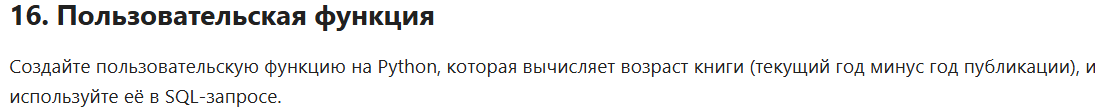

In [ ]:
from datetime import datetime

connection = sqlite3.connect("library.db")
cursor = connection.cursor()

def calculate_age(year_published):
    current_year = datetime.now().year
    return current_year - year_published

connection.create_function("calculate_age", 1, calculate_age)

cursor.execute("SELECT title, year_published, calculate_age(year_published) AS age FROM books")
rows = cursor.fetchall()

for row in rows:
    print(f"Книга: {row[0]}, Год: {row[1]}, Возраст: {row[2]} лет")

connection.close()

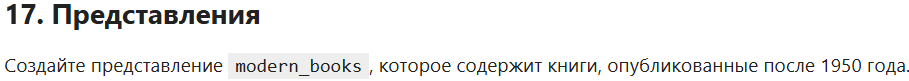

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute('''
    CREATE VIEW IF NOT EXISTS modern_books AS
    SELECT * FROM books WHERE year_published > 1950
''')

cursor.execute("SELECT * FROM modern_books")
rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

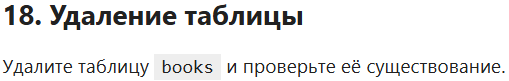

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute("DROP TABLE IF EXISTS books")
connection.commit()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table' AND name='books'")
table_exists = cursor.fetchone()

print("Таблица books существует" if table_exists else "Таблица books не существует")

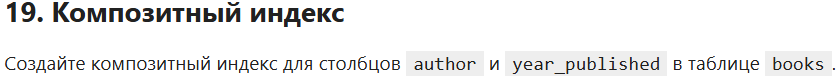

In [ ]:
connection = sqlite3.connect("library.db")
cursor = connection.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS books (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        title TEXT NOT NULL,
        author TEXT NOT NULL,
        year_published INTEGER,
        genre TEXT
    )
''')

books = [
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
    ("1984", "George Orwell", 1949, "Dystopian"),
    ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
]

cursor.executemany('''
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?)
''', books)

cursor.execute("CREATE INDEX IF NOT EXISTS idx_author_year ON books (author, year_published)")

connection.commit()
connection.close()

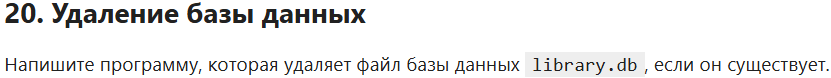

In [ ]:
import os

if os.path.exists("library.db"):
    os.remove("library.db")
    print("Файл library.db удален")
else:
    print("Файл library.db не существует")